In [1]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns


In [3]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [4]:
df_col_keep = missing_value_df[missing_value_df['percent_missing']<50]
df_col = df_col_keep['column_name']

df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,Weight_first,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,80.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,72.9,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,95.9,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


In [5]:
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

[dtype('int64') dtype('float64')]


In [6]:
#normal test and for similarity
#different
df = df.drop(['BUN_first', 'Creatinine_first', 'Na_first', 'Weight_first'], axis=1)
df_copia = df
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,81.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,68.5,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,96.2,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


In [7]:
df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last']
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last']
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last']
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last']
df['Mg_diff'] = df['Mg_first'] - df['Mg_last']
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last']
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']
df['pH_diff'] = df['pH_first'] - df['pH_last']
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']
df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


In [8]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );

In [9]:
cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

In [10]:
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HR_median,HR_highest,HR_lowest,Temp_median,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,54.0,0.7,8.0,73.0,86.0,58.0,37.70,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,80.0,90.0,65.0,37.45,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,44.0,0.3,3.0,85.5,113.0,57.0,37.85,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,68.0,0.7,10.0,74.0,88.0,57.0,36.40,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,73.0,94.0,65.0,37.00,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,101.0,132.0,59.0,36.70,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,90.0,0.7,23.0,108.0,124.0,84.0,36.75,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,72.0,2.8,67.0,100.0,123.0,79.0,37.05,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,52.0,1.0,25.0,108.0,143.0,68.0,36.90,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


In [11]:
numerical_df
to_drop = []

for x in list(numerical_df.columns):
    if 'highest' in x:
        to_drop.append(x)
    if 'median' in x:
        to_drop.append(x)
    if 'lowest' in x:
        to_drop.append(x)
to_drop

['HR_median',
 'HR_highest',
 'HR_lowest',
 'Temp_median',
 'Temp_highest',
 'GCS_highest',
 'Temp_lowest',
 'GCS_lowest',
 'GCS_median',
 'Glucose_lowest',
 'Glucose_median',
 'Glucose_highest',
 'NISysABP_median',
 'NISysABP_highest',
 'NISysABP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NIMAP_median',
 'NIDiasABP_median',
 'NIMAP_highest',
 'NIDiasABP_highest',
 'MAP_lowest',
 'MAP_highest',
 'MAP_median',
 'SysABP_median',
 'SysABP_highest',
 'SysABP_lowest',
 'DiasABP_lowest',
 'DiasABP_highest',
 'DiasABP_median']

In [12]:
numerical_df = numerical_df.drop(to_drop, axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,92.33,79.33,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,49.33,68.33,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,100.30,103.00,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,86.67,98.67,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,75.33,73.00,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,NaN,NaN,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,98.67,89.00,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,90.33,83.67,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,92.00,58.33,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


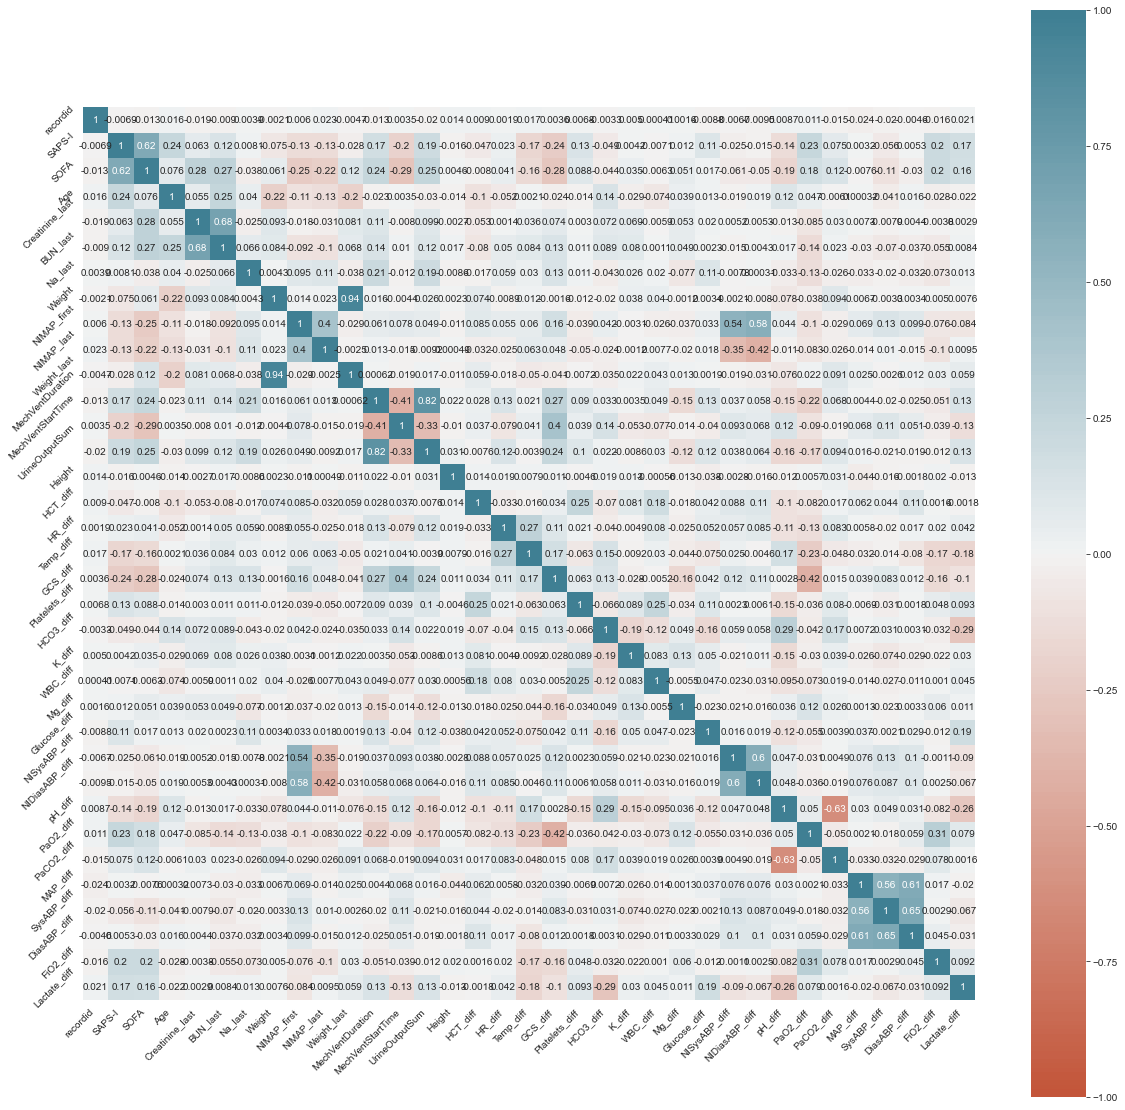

In [13]:
numerical_df
plot_correlation_heatmap(numerical_df)

In [24]:
mean_values = numerical_df.mean()
mean_values

recordid             140965.097167
SAPS-I                   14.170333
SOFA                      6.345500
Age                      64.568500
Creatinine_last           1.358106
BUN_last                 25.456378
Na_last                 138.878016
Weight                   81.332485
NIMAP_first              79.479458
NIMAP_last               77.053711
Weight_last              84.739590
MechVentDuration       1900.302885
MechVentStartTime       288.830395
UrineOutputSum           12.161859
Height                  174.775374
HCT_diff                  1.116401
HR_diff                   3.770595
Temp_diff                -0.454552
GCS_diff                 -2.301052
Platelets_diff           23.628346
HCO3_diff                -1.078138
K_diff                    0.113969
WBC_diff                  0.609017
Mg_diff                  -0.109279
Glucose_diff             20.407496
NISysABP_diff             2.054178
NIDiasABP_diff            2.744559
pH_diff                  -0.029230
PaO2_diff           

In [25]:
numerical_df = numerical_df.fillna(value=mean_values)
numerical_df.isnull().sum()

recordid             0
SAPS-I               0
SOFA                 0
Age                  0
Creatinine_last      0
BUN_last             0
Na_last              0
Weight               0
NIMAP_first          0
NIMAP_last           0
Weight_last          0
MechVentDuration     0
MechVentStartTime    0
UrineOutputSum       0
Height               0
HCT_diff             0
HR_diff              0
Temp_diff            0
GCS_diff             0
Platelets_diff       0
HCO3_diff            0
K_diff               0
WBC_diff             0
Mg_diff              0
Glucose_diff         0
NISysABP_diff        0
NIDiasABP_diff       0
pH_diff              0
PaO2_diff            0
PaCO2_diff           0
MAP_diff             0
SysABP_diff          0
DiasABP_diff         0
FiO2_diff            0
Lactate_diff         0
dtype: int64

array([[<AxesSubplot:title={'center':'recordid'}>,
        <AxesSubplot:title={'center':'SAPS-I'}>,
        <AxesSubplot:title={'center':'SOFA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Creatinine_last'}>,
        <AxesSubplot:title={'center':'BUN_last'}>],
       [<AxesSubplot:title={'center':'Na_last'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'NIMAP_first'}>,
        <AxesSubplot:title={'center':'NIMAP_last'}>,
        <AxesSubplot:title={'center':'Weight_last'}>,
        <AxesSubplot:title={'center':'MechVentDuration'}>],
       [<AxesSubplot:title={'center':'MechVentStartTime'}>,
        <AxesSubplot:title={'center':'UrineOutputSum'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'HCT_diff'}>,
        <AxesSubplot:title={'center':'HR_diff'}>,
        <AxesSubplot:title={'center':'Temp_diff'}>],
       [<AxesSubplot:title={'center':'GCS_diff'}>,
      

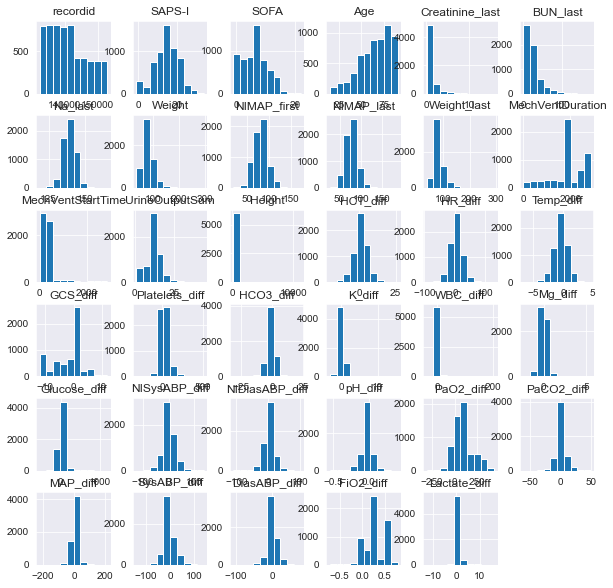

In [37]:
numerical_df.hist(figsize=(10,10))

In [39]:
import matplotlib.pyplot as plt
crea_log = np.log(numerical_df['Creatinine_last'])

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

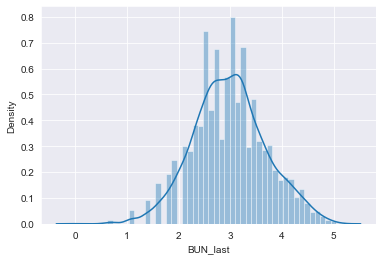

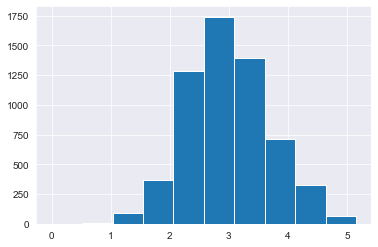

In [40]:
import matplotlib.pyplot as plt
bun_log= np.log(numerical_df['BUN_last'])
sns.distplot(bun_log)
fig = plt.figure()
bun_log.hist()

In [41]:
numerical_df=numerical_df.drop(['Creatinine_last', 'BUN_last'], axis=1)
numerical_df.insert(2, 'Creatinine_last_log', crea_log)
numerical_df.insert(3, 'BUN_last_log', bun_log)
numerical_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,-0.356675,2.079442,1,54.0,136.0,81.332485,92.330000,79.330000,...,19.000000,10.000000,-0.02923,86.523344,1.37964,1.992523,1.201744,1.073643,0.27924,0.647751
1,132540,16,0.262364,3.044522,8,76.0,135.0,76.000000,49.330000,68.330000,...,-35.000000,-11.000000,0.08000,204.000000,-12.00000,10.000000,2.000000,16.000000,0.60000,0.647751
2,132541,21,-1.203973,1.098612,11,44.0,138.0,56.700000,100.300000,103.000000,...,-8.000000,0.000000,0.04000,-108.000000,0.00000,15.000000,22.000000,11.000000,0.60000,0.400000
3,132543,7,-0.356675,2.302585,1,68.0,137.0,84.600000,86.670000,98.670000,...,0.000000,-18.000000,-0.02923,86.523344,1.37964,1.992523,1.201744,1.073643,0.27924,0.647751
4,132545,17,0.000000,3.218876,2,88.0,139.0,81.332485,75.330000,73.000000,...,9.000000,-1.000000,-0.02923,86.523344,1.37964,1.992523,1.201744,1.073643,0.27924,0.647751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,-0.510826,2.197225,6,52.0,140.0,80.000000,79.479458,77.053711,...,2.054178,2.744559,-0.03000,249.000000,5.00000,12.000000,-2.000000,10.000000,0.20000,0.647751
5996,151383,13,-0.356675,3.135494,2,90.0,129.0,72.000000,98.670000,89.000000,...,19.000000,5.000000,-0.02923,86.523344,1.37964,3.000000,4.000000,1.000000,0.00000,0.647751
5997,149623,12,1.029619,4.204693,9,72.0,144.0,185.000000,90.330000,83.670000,...,-4.000000,12.000000,-0.12000,-43.000000,24.00000,35.000000,23.000000,5.000000,0.15000,0.000000
5998,145366,18,0.000000,3.218876,11,52.0,134.0,95.900000,92.000000,58.330000,...,41.000000,30.000000,-0.06000,8.000000,-9.00000,-14.000000,0.000000,6.000000,0.50000,1.700000


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(numerical_df)
scaled_df=pd.DataFrame(scaler.transform(numerical_df))
scaled_df.columns = numerical_df.columns

scaled_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,0.720286,4.397396e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0.000000,-8.908499e-18,0.000000,0.000000,7.908244e-17
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,-1.574997,-8.330336e-01,1.361086e+00,1.089787e+00,-1.666857e+00,0.328683,3.202629e-02,1.106864,1.397652,7.908244e-17
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,-0.427355,-1.663429e-01,8.626583e-01,-1.804519e+00,-1.718778e-01,0.533918,8.344325e-01,0.736089,1.397652,-1.764760e-01
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-0.087313,-1.257291e+00,-8.646334e-17,1.318287e-16,2.766267e-17,0.000000,-8.908499e-18,0.000000,0.000000,7.908244e-17
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,0.295234,-2.269512e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0.000000,-8.908499e-18,0.000000,0.000000,7.908244e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,0.000000,-2.691547e-17,-9.589378e-03,1.507234e+00,4.510303e-01,0.410777,-1.284550e-01,0.661934,-0.345271,7.908244e-17
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,0.720286,1.366983e-01,-8.646334e-17,1.318287e-16,2.766267e-17,0.041354,1.122669e-01,-0.005461,-1.216732,7.908244e-17
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.657152,4.658134e-01,...,-0.257334,5.609560e-01,-1.131051e+00,-1.201539e+00,2.818081e+00,1.354858,8.745528e-01,0.291159,-0.563136,-4.614005e-01
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,1.655402,1.651904e+00,-3.834098e-01,-7.284314e-01,-1.293112e+00,-0.656445,-4.821433e-02,0.365314,0.961921,7.495288e-01


In [43]:
frames=[scaled_df, categorical_df]
df_3 = pd.concat(frames, axis=1)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,1,0.0,NaN
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,3.202629e-02,1.106864,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,8.344325e-01,0.736089,1.397652,-1.764760e-01,0,0,0,0,0.0,1.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,0,1.0,NaN
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,-1.284550e-01,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,1.122669e-01,-0.005461,-1.216732,7.908244e-17,0,1,0,0,0.0,NaN
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.657152,4.658134e-01,...,8.745528e-01,0.291159,-0.563136,-4.614005e-01,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,-4.821433e-02,0.365314,0.961921,7.495288e-01,1,0,0,0,1.0,1.0


In [44]:
categorical_df.isnull().sum()

In-hospital_death       0
CCU                     0
CSRU                    0
SICU                    0
Gender                  6
MechVentLast8Hour    2256
dtype: int64

In [45]:
#tolgo righe con genere nan
indexNames = df_3[df_3['Gender'].isnull()].index
df_3.drop(indexNames, inplace=True)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.778279,1.602599e-01,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,1,0.0,NaN
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.825970,-6.141845e-01,...,3.202629e-02,1.106864,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,1.260974,1.826724e+00,...,8.344325e-01,0.736089,1.397652,-1.764760e-01,0,0,0,0,0.0,1.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.435488,1.521874e+00,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,0,1.0,NaN
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,-0.251308,-2.853976e-01,...,-8.908499e-18,0.000000,0.000000,7.908244e-17,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.000000,1.000502e-15,...,-1.284550e-01,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,1.162255,8.410670e-01,...,1.122669e-01,-0.005461,-1.216732,7.908244e-17,0,1,0,0,0.0,NaN
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.657152,4.658134e-01,...,8.745528e-01,0.291159,-0.563136,-4.614005e-01,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.758293,-1.318225e+00,...,-4.821433e-02,0.365314,0.961921,7.495288e-01,1,0,0,0,1.0,1.0


In [46]:
#tolgo righe con mech nan
indexNames = df_3[df_3['MechVentLast8Hour'].isnull()].index
df_3.drop(indexNames, inplace=True)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-0.237425,-1.825970,-6.141845e-01,...,0.032026,1.106864,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743,1.260974,1.826724e+00,...,0.834433,0.736089,1.397652,-1.764760e-01,0,0,0,0,0.0,1.0
5,-1.507451,-0.027991,-0.629755,-0.299047,1.101179,-0.032525,-0.669431,1.454497,1.382102,-1.083075e+00,...,2.318884,0.958554,-0.781002,7.908244e-17,0,1,0,0,1.0,1.0
7,-1.506735,0.793656,-0.869744,1.523650,0.391428,0.768443,-0.436830,-1.466295,-0.735819,-1.927924e+00,...,-0.970982,1.032709,1.397652,-7.463250e-01,1,0,0,0,0.0,1.0
9,-1.506019,-0.027991,0.333993,0.151660,-0.081740,0.539595,0.028374,-0.678215,0.193232,-5.902471e-01,...,-1.492546,-0.747011,0.961921,7.908244e-17,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,1.854997,0.300668,0.209379,-0.299047,0.864595,0.882867,0.028374,0.274604,0.516038,4.890468e-01,...,-1.773388,-1.191942,0.090460,7.908244e-17,0,0,1,0,1.0,0.0
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-0.059328,0.000000,1.000502e-15,...,-0.128455,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720,0.657152,4.658134e-01,...,0.874553,0.291159,-0.563136,-4.614005e-01,0,1,0,0,0.0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,0.648608,0.758293,-1.318225e+00,...,-0.048214,0.365314,0.961921,7.495288e-01,1,0,0,0,1.0,1.0


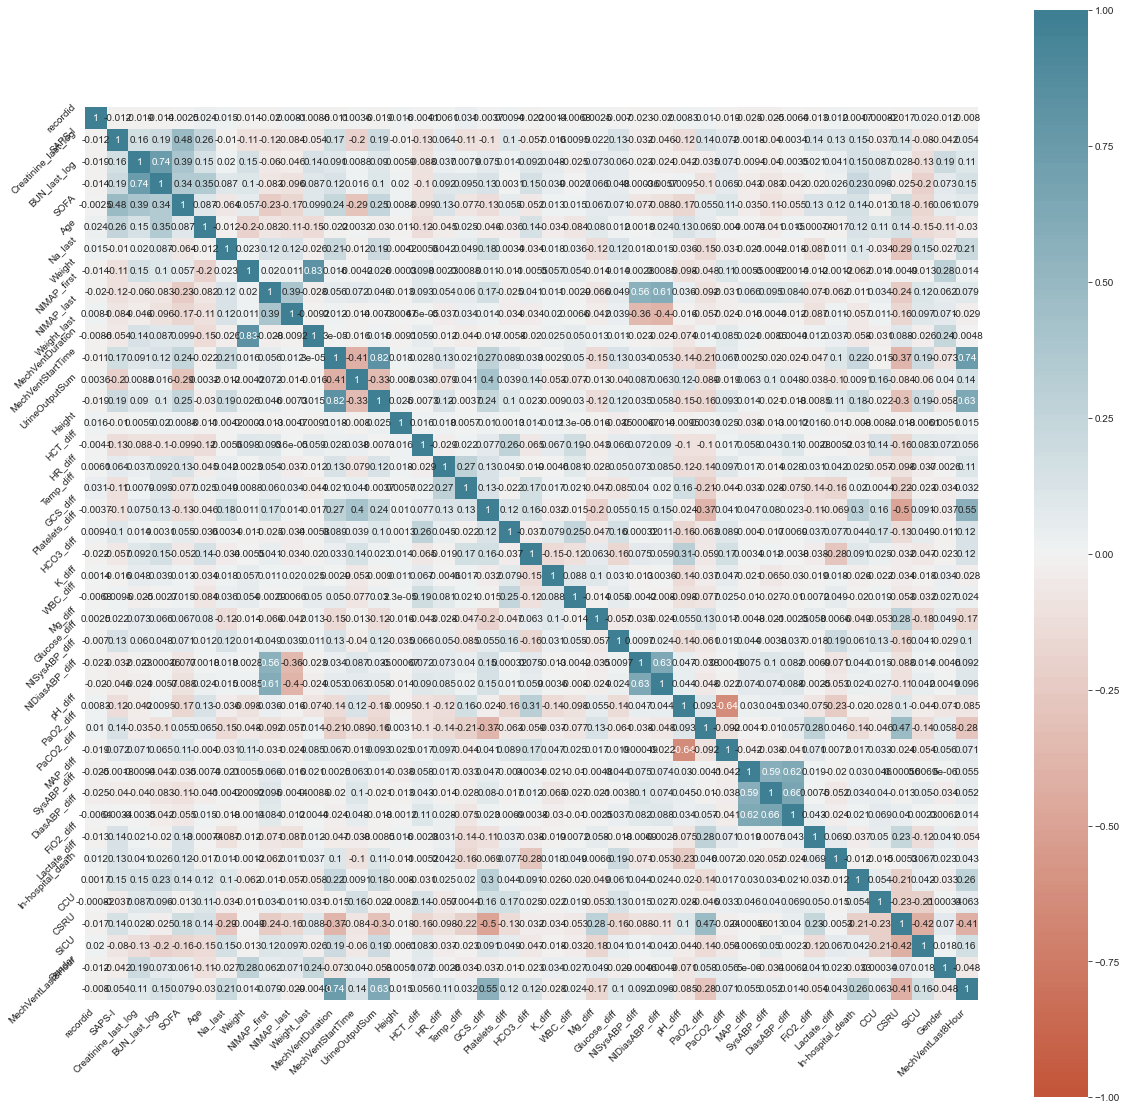

In [47]:
plot_correlation_heatmap(df_3)

In [48]:
df_3=df_3.drop(['recordid'], axis=1)
df_3

,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,Weight_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
1,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-0.237425,-1.825970,-6.141845e-01,-0.156409,...,0.032026,1.106864,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
2,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743,1.260974,1.826724e+00,-1.396883,...,0.834433,0.736089,1.397652,-1.764760e-01,0,0,0,0,0.0,1.0
5,-0.027991,-0.629755,-0.299047,1.101179,-0.032525,-0.669431,1.454497,1.382102,-1.083075e+00,0.000000,...,2.318884,0.958554,-0.781002,7.908244e-17,0,1,0,0,1.0,1.0
7,0.793656,-0.869744,1.523650,0.391428,0.768443,-0.436830,-1.466295,-0.735819,-1.927924e+00,-1.810374,...,-0.970982,1.032709,1.397652,-7.463250e-01,1,0,0,0,0.0,1.0
9,-0.027991,0.333993,0.151660,-0.081740,0.539595,0.028374,-0.678215,0.193232,-5.902471e-01,-0.749246,...,-1.492546,-0.747011,0.961921,7.908244e-17,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.300668,0.209379,-0.299047,0.864595,0.882867,0.028374,0.274604,0.516038,4.890468e-01,0.301919,...,-1.773388,-1.191942,0.090460,7.908244e-17,0,0,1,0,1.0,0.0
5995,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-0.059328,0.000000,1.000502e-15,0.000000,...,-0.128455,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0
5997,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720,0.657152,4.658134e-01,0.000000,...,0.874553,0.291159,-0.563136,-4.614005e-01,0,1,0,0,0.0,0.0
5998,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,0.648608,0.758293,-1.318225e+00,0.570937,...,-0.048214,0.365314,0.961921,7.495288e-01,1,0,0,0,1.0,1.0


In [49]:
df_3.to_csv('df_3.csv', index=False)